In [72]:
# LSST stack imports
from lsst.daf.persistence import Butler
import lsst.afw.display as afw_display
import matplotlib.pyplot as plt
%matplotlib inline

# Firefly client imports
from firefly_client import FireflyClient

# Standard libraries in support of Firefly display
from urllib.parse import urlparse, urlunparse, ParseResult
from IPython.display import display, Markdown
import os

In [ ]:
#Coadd or single visit? For now, let's just do a coadd 

In [12]:
print ('aaA'.lower()) 


aaa


In [174]:
data_set = 'UDEEP'# can be WIDE, DEEP, UDEEP
sample_datadir = '/datasets/hsc/repo/rerun/DM-13666/' + data_set 
butler = Butler(sample_datadir)
#help(butler)

In [187]:
#print (butler)
tract = 8766
patch = '8,3'
#patch = '1,1'
data_set = 'deepCoadd_forced_src'
print('It would be great to be able to query butler based on things like, eg, RA, Dec rather than, the tract and patch number')

It would be great to be able to query butler based on things like, eg, RA, Dec rather than, the tract and patch number


In [190]:
deep_coadd_Y = butler.get(data_set, tract = tract, patch = patch, dataId={'filter': 'HSC-Y'})
deep_coadd_I = butler.get(data_set, tract = tract, patch = patch, dataId={'filter': 'HSC-I'})
print ('len(deep_coadd_I) = ' + str(len(deep_coadd_I)))
print ('len(deep_coadd_Y) = ' + str(len(deep_coadd_Y)))
print (deep_coadd_I)
print (deep_coadd_Y)

len(deep_coadd_I) = 557
len(deep_coadd_Y) = 557
        id             coord_ra      ... base_ClassificationExtendedness_flag
                         rad         ...                                     
----------------- ------------------ ... ------------------------------------
38554388112867329 0.6091708127037836 ...                                 True
38554388112867330 0.6088483716148637 ...                                 True
38554388112867331 0.6088083727993384 ...                                 True
38554388112867332 0.6086042979258403 ...                                 True
38554388112867333  0.609303056672418 ...                                 True
38554388112867334 0.6088255166576976 ...                                 True
38554388112867335 0.6087218464317827 ...                                 True
38554388112867336  0.608714501260787 ...                                 True
38554388112867337 0.6097773391108072 ...                                 True
3855438811286733

In [192]:
deep_coadd_I_table =  deep_coadd_I.asAstropy()
deep_coadd_Y_table =  deep_coadd_Y.asAstropy()
#print (deep_coadd[556])
#print (deep_coadd[556]['id'])
#print (deep_coadd[556].schema)
print (type(deep_coadd_Y_table))
print (type(deep_coadd_I_table))
#print (deep_coadd_table.info())
#print(deep_coadd_Y_table.info())
#print(deep_coadd_I_table.info())

<class 'astropy.table.table.Table'>
<class 'astropy.table.table.Table'>


In [193]:
ras_I = deep_coadd_I_table['coord_ra']
decs_I = deep_coadd_I_table['coord_dec']
#Note that the syntax for these bad pixels is different from 
# that listed on page 6 of the paper 'The Hyper Suprime-Cam Software Pipeline' 
#
I_bad_pixel_flags = deep_coadd_I_table['base_PixelFlags_flag_bad']
Y_cr_pixel_flags=deep_coadd_I_table['base_PixelFlags_flag_cr']

In [210]:
print (deep_coadd_I_table['base_PixelFlags_flag_edge'])
print (deep_coadd_Y_table['base_PixelFlags_flag_edge'])

base_PixelFlags_flag_edge
-------------------------
                    False
                     True
                     True
                     True
                     True
                     True
                     True
                     True
                     True
                     True
                      ...
                    False
                    False
                    False
                    False
                    False
                    False
                    False
                    False
                    False
                    False
                    False
Length = 557 rows
base_PixelFlags_flag_edge
-------------------------
                     True
                     True
                     True
                     True
                     True
                     True
                     True
                    False
                    False
                    False
                      ...
                    

In [154]:
#print (deep_coadd_table['base_PixelFlags_flag_edge'])

['base_PixelFlags_flag_bad', 'base_PixelFlags_flag_cr', 'base_PixelFlags_flag_offimage', 'base_PixelFlags_flag_edge', 'base_PixelFlags_flag_saturated', 'base_PixelFlags_flag_rejected']


[False, False, False, False, False, False]

In [203]:
#Specify the flags that we wish to reject on, and then combine them together so that if any flag is on, 
# the object is marked for rejection. 
flags_to_reject_on_suffixes = ['flag_bad', 'flag_cr', 'flag_offimage','flag_edge', 'flag_saturated', 'flag_rejected']
flags_to_reject_on = ['base_PixelFlags_' + suffix for suffix in flags_to_reject_on_suffixes]
base_PixelFlags_I_master_rejection = ([any([deep_coadd_I_table[rej_flag][i] for rej_flag in flags_to_reject_on]) for i in range(len(deep_coadd))])
base_PixelFlags_Y_master_rejection = ([any([deep_coadd_Y_table[rej_flag][i] for rej_flag in flags_to_reject_on]) for i in range(len(deep_coadd))])
print(base_PixelFlags_Y_master_rejection)
print(base_PixelFlags_I_master_rejection)

[True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False

In [198]:
#Now define a NEW astropy table and fill it in with those objects that are not rejected by the flag 
good_I_objects = deep_coadd_table[base_PixelFlags_I_master_rejection]
good_Y_objects = deep_coadd_table[base_PixelFlags_Y_master_rejection]
print ('len(good_objects) = ' + str(len(good_objects)))
print (good_objects)

len(good_objects) = 261
        id             coord_ra      ... base_ClassificationExtendedness_flag
                         rad         ...                                     
----------------- ------------------ ... ------------------------------------
38554388112867330 0.6088483716148637 ...                                 True
38554388112867331 0.6088083727993384 ...                                 True
38554388112867332 0.6086042979258403 ...                                 True
38554388112867333  0.609303056672418 ...                                 True
38554388112867334 0.6088255166576976 ...                                 True
38554388112867335 0.6087218464317827 ...                                 True
38554388112867336  0.608714501260787 ...                                 True
38554388112867337 0.6097773391108072 ...                                 True
38554388112867338 0.6086467484672133 ...                                 True
38554388112867339 0.6085977706268977 ...

In [167]:
base_PixelFlags_master_rejection
refined_objects = [deep_coadd_table[i] for i in range(len(deep_coadd_table)) if not(base_PixelFlags_master_rejection[i])] 
#refined_objects = [1 for i in range(len(deep_coadd_table)) if not(base_PixelFlags_master_rejection[i])] 


In [171]:
print (len(refined_objects[0])) 

492


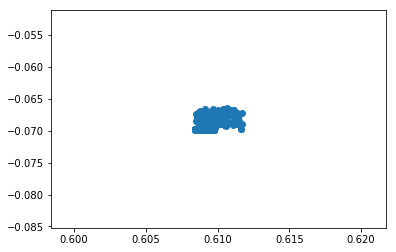

In [74]:
plt.scatter(ras, decs)
plt.show() 

In [ ]:
user_specs = {portion_of_sky:[], object_type:[], object_qualities:[],flags_to_not_cut_on:[]}

In [153]:
test = [False, True, True, False]
print ([elem for elem in test if elem == True ])

[True, True]
